In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import display, Image, Markdown

from serpparser import change_positions

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [4]:
names=['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [45]:
%store -r organic
%store -r organic_spb
%store -r positions
%store -r positions_spb

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [6]:
curr_month = data.index[-1][0]
data.ix[curr_month]

,geo,url,note,cost,duration
0,spb,http://www.svadbaspb.ru/dress/133/,,502.50,1
1,spb,http://svadba.pro/blogs/love-forever/14-narodn...,,0.00,12
2,both,https://sape.ru,биржа арендных ссылок,2019.00,1
3,both,https://etxt.biz,тексты,3090.00,1
4,msk,http://my-svadba.ru/blog/item/44035/,,0.00,12
5,msk,http://svadbavo.ru/catalog/firm/id15016,аггрегатор,8025.00,3
6,spb,http://spb.the-wedding.ru/svadebnye-platya/lov...,,0.00,12
7,spb,https://the-bride.ru/members/love-forever-spb/,,0.00,12
8,spb,https://svoipravila.ru/moda/sovety-stilistov/k...,,2116.80,12
9,spb,https://korden.org/moscow/svadba/news/15399_%D...,,0.00,12


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными.

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию.

### Расходы в разрезе регионов за текущий период

In [7]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data.ix[curr_month], values='cost', index=['geo'], 
                        aggfunc=sum, margins=True).to_frame()

,cost
geo,
both,5700.69
msk,27619.74
spb,21808.10
All,55128.53


## 2. Анализ трафика

### 2.1. LOVE-FOREVER.RU

Таблица с данными по величине поискового трафика c 2016 года и его изменениям к месяцу и году.

In [69]:
# organic = organic.applymap(lambda x: '{:.2f}'.format(x))
organic['2016':'2017']

,traffic,MoM,YoY
2016-01-31,16046,43.794247,345.598445
2016-02-29,17191,7.135735,303.355232
2016-03-31,17825,3.687976,149.964942
2016-04-30,17671,-0.863955,85.541789
2016-05-31,18611,5.319450,35.826887
2016-06-30,18821,1.128365,20.477532
2016-07-31,17058,-9.367196,2.235541
2016-08-31,15728,-7.796928,-0.487188
2016-09-30,13497,-14.184893,-6.891556
2016-10-31,11486,-14.899607,-17.265721


**Комментарий:** наблюдается спад, незначительно превышающий сезонный коэфициент, вследствие потери части трафика в первую половину августа из-за санкций Яндекса.

### Линейная диаграмма изменения трафика

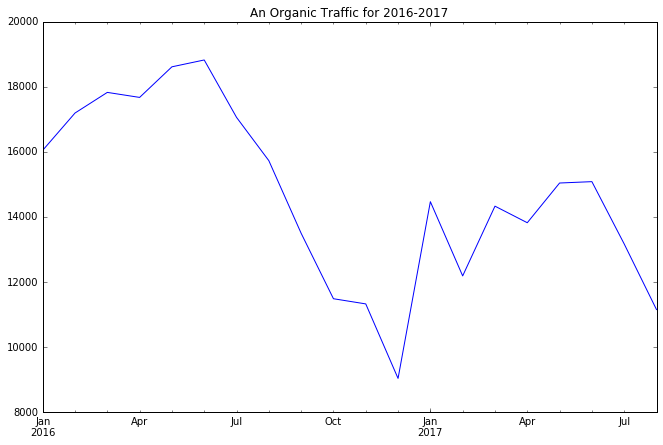

In [70]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['2016':'2017'].traffic.plot(ax=ax)
ax.set_title('An Organic Traffic for 2016-2017')

**Источник:** https://metrika.yandex.ru

<p><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

### Подсветка данных

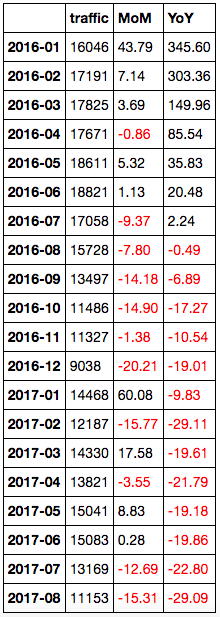

In [74]:
display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

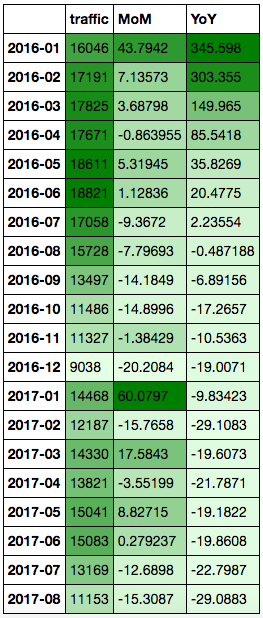

In [75]:
display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [71]:
negative_MoM = organic['MoM'] < 0

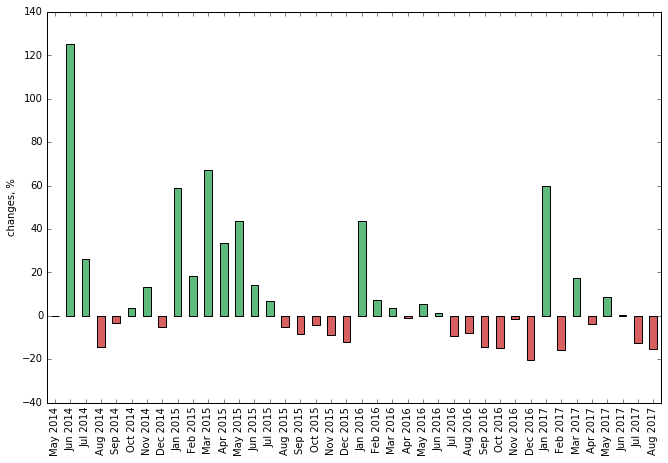

In [72]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic.MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fba7d'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic.index]);

На диаграмме чётко видна сезонная волатильность поискового трафика.

### 2.2. SPB.LOVE-FOREVER.RU

Таблица с данными по органическому трафику с марта 2017

In [128]:
organic_spb

,traffic,MoM
2017-03-31,13,NaN
2017-04-30,508,3807.692308
2017-05-31,998,96.456693
2017-06-30,1296,29.859719
2017-07-31,1259,-2.854938
2017-08-31,1065,-15.409055


## 3. Анализ позиций

### 3.1. LOVE-FOREVER.RU

#### Позиции с интервалом в 7-10 дней
Выборка за август-сентябрь

In [10]:
All = slice(None)

In [11]:
change_positions(positions.loc[(slice('2017-08','2017-09'), All), All])

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-08-02 вечерние платья               51          20            47   
           свадебные платья               3           7            11   
           свадебный салон                9           8            13   
2017-08-10 вечерние платья               51          40            47   
           свадебные платья               1           6             8   
           свадебный салон               51          16             1   
2017-08-17 вечерние платья               51          18            45   
           свадебные платья               2           6             8   
           свадебный салон               51          18             1   
2017-08-26 вечерние платья               51          24            37   
           свадебные платья               2           4            14   
           свадебный салон               43          51            36   
2017-09-03 вечерние платья               51          26            39   
           свадебные платья               2           5            12   
           свадебный салон               20          11             1   
2017-09-11 вечерние платья               51          28            22   
           свадебные платья               1           4             5   
           свадебный салон               35          18             1   
2017-09-19 вечерние платья               51          34            51   
           свадебные платья               2           8             5   
           свадебный салон               23          20             1   
2017-09-25 вечерние платья               51   ↑24 (+10)     ↑39 (+12)   
           свадебные платья               2     ↑3 (+5)       ↓8 (-3)   
           свадебный салон        ↓35 (-12)    ↑17 (+3)             1   

                            salon-love-forever.ru  
2017-08-02 вечерние платья                     18  
           свадебные платья                    19  
           свадебный салон                     15  
2017-08-10 вечерние платья                     49  
           свадебные платья                    48  
           свадебный салон                     19  
2017-08-17 вечерние платья                     22  
           свадебные платья                    31  
           свадебный салон                     14  
2017-08-26 вечерние платья                     18  
           свадебные платья                    51  
           свадебный салон                     45  
2017-09-03 вечерние платья                     24  
           свадебные платья                    51  
           свадебный салон                     37  
2017-09-11 вечерние платья                     13  
           свадебные платья                    43  
           свадебный салон                     12  
2017-09-19 вечерние платья                     14  
           свадебные платья                    44  
           свадебный салон                     19  
2017-09-25 вечерние платья               ↑11 (+3)  
           свадебные платья              ↓46 (-2)  
           свадебный салон               ↓22 (-3)

**Комментарий:** позиции меняются характерным для «однорукого бандита» образом (с первой на вторую или третью страницу и обратно). Запрос «свадебные платья» застрял на пятой странице, что похоже на искусственное занижение (это в Яндексе отрицают). По этому поводу снова буду писать в поддержку поисковика.

#### Среднее значение позиций по месяцам и его изменение

In [14]:
change_positions(positions.unstack().resample('M', 
                            kind='period').mean().applymap(lambda x: round(x)).stack())

bel-avantage.ru domvesta.ru marytrufel.ru  \
2017-06 вечерние платья               51          23            44   
        свадебные платья               3           6            12   
        свадебный салон               15           4            11   
2017-07 вечерние платья               51          19            45   
        свадебные платья               2           5            19   
        свадебный салон               12           4             5   
2017-08 вечерние платья               51          26            44   
        свадебные платья               2           6            10   
        свадебный салон               38          23            13   
2017-09 вечерние платья               51    ↓28 (-2)      ↑38 (+6)   
        свадебные платья               2     ↑5 (+1)       ↑8 (+2)   
        свадебный салон        ↑28 (+10)    ↑16 (+7)      ↑1 (+12)   

                         salon-love-forever.ru  
2017-06 вечерние платья                     14  
        свадебные платья                    17  
        свадебный салон                      4  
2017-07 вечерние платья                     14  
        свадебные платья                    11  
        свадебный салон                      8  
2017-08 вечерние платья                     27  
        свадебные платья                    37  
        свадебный салон                     23  
2017-09 вечерние платья              ↑16 (+11)  
        свадебные платья              ↓46 (-9)  
        свадебный салон               ↑22 (+1)

### 3.2. SPB.LOVE-FOREVER.RU

In [64]:
cols = positions_spb.columns.tolist()
cols.append(cols.pop(3))

In [66]:
change_positions(positions_spb[cols])

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08-10 вечерние платья            NaN           NaN               NaN   
           свадебные платья           NaN           NaN               NaN   
           свадебный салон            NaN           NaN               NaN   
2017-08-17 вечерние платья            NaN           NaN               NaN   
           свадебные платья           NaN           NaN               NaN   
           свадебный салон            NaN           NaN               NaN   
2017-08-26 вечерние платья              5            25                51   
           свадебные платья             2            26                21   
           свадебный салон             25            40                 7   
2017-09-03 вечерние платья             25            30                51   
           свадебные платья            23            25                19   
           свадебный салон             46            36                 7   
2017-09-11 вечерние платья              5            51                51   
           свадебные платья             4            51                14   
           свадебный салон              9            51                 4   
2017-09-19 вечерние платья              5            51                51   
           свадебные платья             5            23                 7   
           свадебный салон             17            51                 6   
2017-09-25 вечерние платья        ↑3 (+2)            51                51   
           свадебные платья       ↑2 (+3)      ↑22 (+1)         ↓17 (-10)   
           свадебный салон       ↑4 (+13)            51         ↓19 (-13)   

                            vbelom.ru vesnawedding.ru  \
2017-08-10 вечерние платья        NaN             NaN   
           свадебные платья       NaN             NaN   
           свадебный салон        NaN             NaN   
2017-08-17 вечерние платья        NaN             NaN   
           свадебные платья       NaN             NaN   
           свадебный салон        NaN             NaN   
2017-08-26 вечерние платья         32              51   
           свадебные платья        24               1   
           свадебный салон          2               6   
2017-09-03 вечерние платья         22              51   
           свадебные платья        30               1   
           свадебный салон          1               8   
2017-09-11 вечерние платья         20              51   
           свадебные платья        13               1   
           свадебный салон          1               5   
2017-09-19 вечерние платья         18              51   
           свадебные платья        14               1   
           свадебный салон          1               7   
2017-09-25 вечерние платья   ↑7 (+11)              51   
           свадебные платья   ↑6 (+8)               1   
           свадебный салон          1         ↑2 (+5)   

                            spb.salon-love-forever.ru  
2017-08-10 вечерние платья                         44  
           свадебные платья                        42  
           свадебный салон                         51  
2017-08-17 вечерние платья                         50  
           свадебные платья                        18  
           свадебный салон                         51  
2017-08-26 вечерние платья                         10  
           свадебные платья                         8  
           свадебный салон                         33  
2017-09-03 вечерние платья                         24  
           свадебные платья                        11  
           свадебный салон                         51  
2017-09-11 вечерние платья                          8  
           свадебные платья                         2  
           свадебный салон                         15  
2017-09-19 вечерние платья                          9  
           свадебные платья                        11  
           свадебный салон                         14  
2017-09-25 веч

**Комментарий:** позиции меняются характерным для «однорукого бандита» образом (с первой на вторую или третью страницу и обратно). Это особенно заметно на запросах «вечерние платья» и «свадебный салон», которые одновременно свалились на третью страницу. Каких-либо аномалий (в виде работы фильтра) не отмечено.

#### Среднее значение позиций по месяцам и его изменение

In [8]:
change_positions(positions_spb.unstack().resample('M', 
                                kind='period').mean().applymap(lambda x: round(x)).stack())

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08 вечерние платья              5            25                51   
        свадебные платья             2            26                21   
        свадебный салон             25            40                 7   
2017-09 вечерние платья       ↓10 (-5)     ↓46 (-21)                51   
        свадебные платья       ↓8 (-6)      ↓30 (-4)          ↑14 (+7)   
        свадебный салон       ↑19 (+6)      ↓47 (-7)           ↓9 (-2)   

                         spb.salon-love-forever.ru  vbelom.ru vesnawedding.ru  
2017-08 вечерние платья                         35         32              51  
        свадебные платья                        23         24               1  
        свадебный салон                         45          2               6  
2017-09 вечерние платья                  ↑18 (+17)  ↑17 (+15)              51  
        свадебные платья                  ↑8 (+15)   ↑16 (+8)               1  
        свадебный салон                  ↑27 (+18)    ↑1 (+1)               6

**Источник:** https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.